In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools

# data_input_dir      = "/Users/acha692/OneDrive - PNNL/Documents/GOODEEP/GitHub/hdev-depot-charging-2021/combined_transportation_loads/"
scenario_to_process = "NetZeroNoCCS_Climate"
climate_to_process  = "rcp45cooler"
year_to_process     = "2050"


df1 = pd.read_csv(os.path.join('..', 'input', + 'wecc_hourly_transportation_load_' + scenario_to_process + '_' + climate_to_process + '_' + year_to_process + '.csv'))

#---Month of the year---
df1['month'] = pd.to_datetime(df1['time']).dt.strftime("%m")
df1['month'] = df1['month'].astype(str).astype(int)

#---Hour of the day---
df1['hour']  = pd.to_datetime(df1['time']).dt.strftime("%H")
df1['hour']  = df1['hour'].astype(str).astype(int)


#--Combining rail data (freight and passenger) and renaming columns---
df1['Rail'] = df1['passenger_rail_load_MWh'] + df1['freight_rail_load_MWh']
df1         = df1.rename(columns ={"HDV_load_MWh": "HDV", "MDV_load_MWh": "MDV", "LDV_load_MWh": "LDV", "aviation_load_MWh": "Aviation",
                    "ship_load_MWh": "Ship", "transportation_load_MWh": "Total"})

In [6]:
#--- Uncomment this cell only to save data; did it for MATLAB plots

# df2       = df1.filter(['LDV','MDV','HDV', 'Aviation', 'Rail', 'Ship', 'Total', 'month', 'hour'], axis=1)
# avg_month = pd.DataFrame()

# for i in range(12):
#     data_month      = df2[df2['month'] == i+1]
#     avg_month_only  = data_month.groupby(['hour']).mean()
#     avg_month       = pd.concat([avg_month, avg_month_only])

# display(avg_month)
# avg_month.to_csv(os.path.join('..', 'output', "avg_load_profile" + scenario_to_process + year_to_process +'.csv' ))

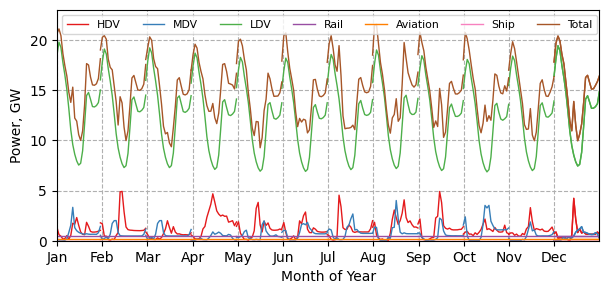

In [59]:
cols   = ['HDV', 'MDV', 'LDV', 'Rail', 'Aviation', 'Ship', 'Total']

mnth   = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fontsize_labels = 10
fontsize_legend = 7.8

fig, ax = plt.subplots(figsize=(7,3))

colors  = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#f781bf','#a65628']
cnt     = 0

for col in cols:
    
    col_data = df1.filter([col,'hour','month'], axis=1)   
    color    = colors[cnt]
    
    for i in range(12):

        col_data_month = col_data[col_data['month'] == i+1]
        avg_month      = col_data_month.groupby(['hour']).mean()/1000
        ax.plot(np.linspace(i*24, (i+1)*24, 24), avg_month[col], color =color, 
                linestyle='solid', linewidth=1, markersize=4)
        
        if i == 11: # for legend to be obtained from last month plot
            col_data_month = col_data[col_data['month'] == i+1]
            avg_month      = col_data_month.groupby(['hour']).mean()/1000
            ax.plot(np.linspace(i*24, (i+1)*24, 24), avg_month[col], color =color,  label = col,
                linestyle='solid', linewidth=1, markersize=4)
    cnt = cnt + 1
    
ax.set_xticks(np.linspace(1,12*24, 13)[0:12])
ax.set_xticklabels(mnth, fontsize=fontsize_labels)
plt.yticks(fontsize=fontsize_labels)
plt.xticks(fontsize=fontsize_labels)
plt.ylabel('Power, GW', fontsize=fontsize_labels)
plt.xlabel('Month of Year', fontsize=fontsize_labels))
plt.xlim(1, 24*12)
plt.ylim(0, 23) #(0,22)
plt.legend(ncols = 7, fontsize =fontsize_legend)
plt.grid(axis='both', linestyle='--')
plot_fp  = os.path.join('..', 'output', f'Transportation_Average_Monthly_Electric_Power_{scenario_to_process}{year_to_process}.pdf')
plt.savefig(plot_fp, bbox_inches='tight', dpi=300)